## 仿射变换

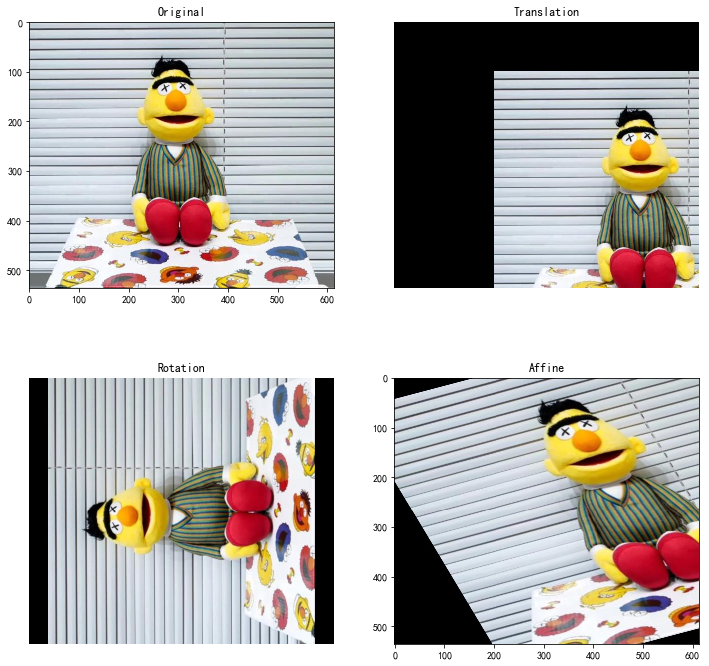

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
pic = "bert"
bimg = pic + ".jpg"
img = cv.imread(bimg, -1) # 1 彩色；0 灰度；-1 原始
rows, cols = img.shape[:2]

M = np.float32([[1,0,200], [0,1,100]])
dst1 = cv.warpAffine(img, M, (cols, rows))
cv.imwrite(pic + "_translation.jpg", dst1)


#Rotation
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst2 = cv.warpAffine(img,M,(cols,rows))
cv.imwrite(pic + "_rotation.jpg", dst2)

#AffineTransform
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst3 = cv.warpAffine(img, M, (cols, rows))
cv.imwrite(pic + "_affine.jpg", dst3)


pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst3 = cv.warpAffine(img, M, (cols, rows))
cv.imwrite(pic + "_affine.jpg", dst3)


plt.figure(figsize=(12,12))

plt.subplot(2,2,1), plt.title('Original')
tmp1 = cv.imread(pic + ".jpg",-1)
type(tmp1)
tmp1.shape
plt.imshow(np.flip(tmp1, axis = 2))
     
plt.subplot(2,2,2),plt.title('Translation')
tmp4 = cv.imread(pic + "_translation.jpg", -1)
type(tmp4)
tmp4.shape
plt.imshow(np.flip(tmp4, axis = 2)),plt.axis('off')

    
plt.subplot(2,2,3),plt.title('Rotation')
tmp2 = cv.imread(pic + "_rotation.jpg", -1)
type(tmp2)
tmp2.shape
plt.imshow(np.flip(tmp2, axis = 2)),plt.axis('off')


plt.subplot(2,2,4),plt.title('Affine')
tmp3 = cv.imread(pic + "_affine.jpg", -1)
type(tmp3)
tmp3.shape
plt.imshow(np.flip(tmp3, axis = 2))

plt.show()

## 平移 ，可指定移动方向和距离

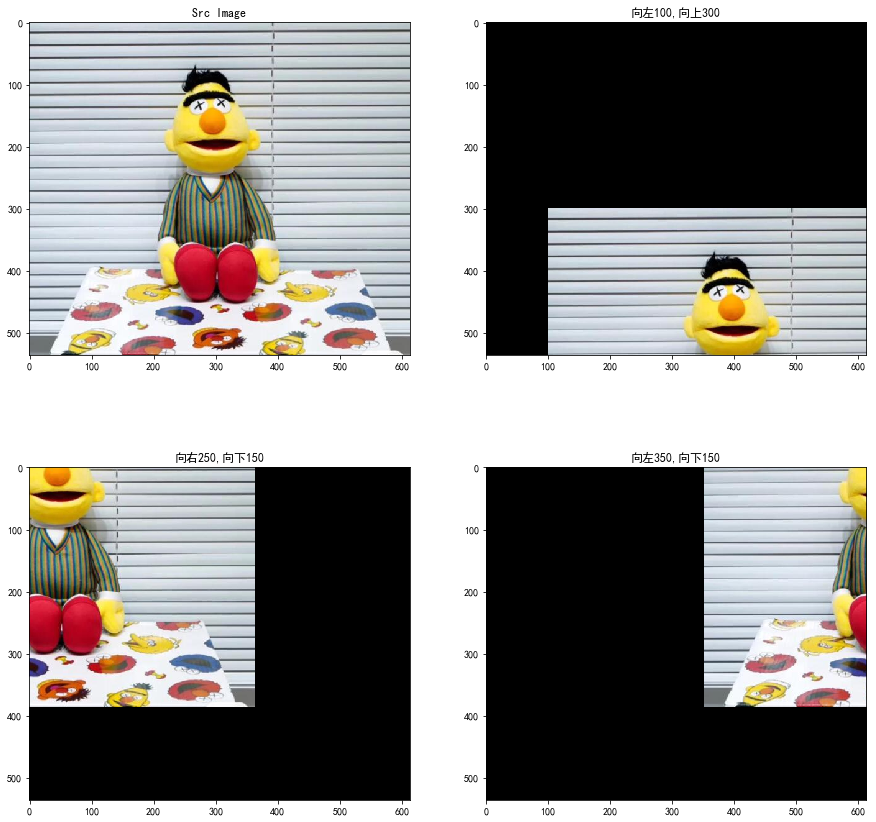

In [4]:
import cv2
def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])  # x表示左右平移量, y表示上下平移量
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted


shifted1 = translate(img, 100, 300)  # 向左100,向上300
shifted2 = translate(img, -250, -150)  # 向右250,向下150
shifted3 = translate(img, 350, -150)  # 向左350,向下150

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.title("Src Image")
plt.imshow(img[:,:,::-1])

plt.subplot(222)
plt.title("向左100,向上300")
plt.imshow(shifted1[:,:,::-1])

plt.subplot(223)
plt.title("向右250,向下150")
plt.imshow(shifted2[:,:,::-1])

plt.subplot(224)
plt.title("向左350,向下150")
plt.imshow(shifted3[:,:,::-1])

plt.show()



## 缩放，可指定缩放比例，基于warpAffine

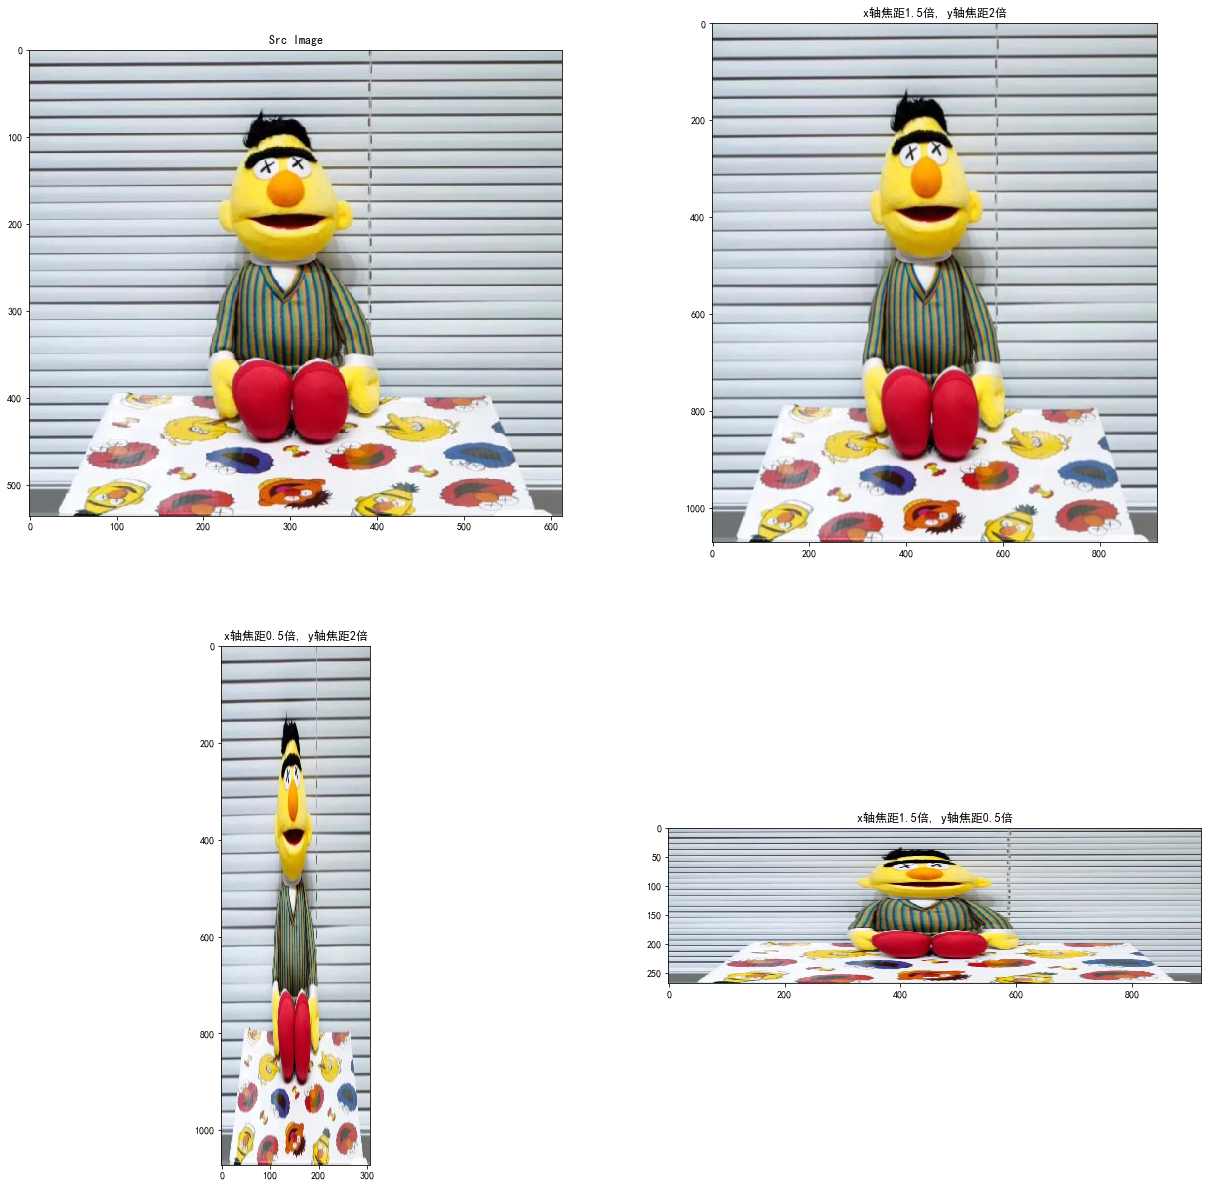

In [9]:
def affineresize(img, fx, fy):
    img = cv2.imread(img + '.jpg')
    height,width,channel = img.shape
    M = np.float32([[fx, 0, 0], [0, fy, 0]])
    resized = cv2.warpAffine(img, M, (int(width*fx), int(height*fy)))
    return resized

pic = "bert"
r0 = affineresize(pic, 1, 1)
r1 = affineresize(pic, 1.5, 2)
r2 = affineresize(pic, 0.5, 2)
r3 = affineresize(pic, 1.5, 0.5)

plt.figure(figsize=(21,21))

plt.subplot(221)
plt.title("Src Image")
plt.imshow(r0[:,:,::-1])

plt.subplot(222)
plt.title("x轴焦距1.5倍, y轴焦距2倍")
plt.imshow(r1[:,:,::-1])

plt.subplot(223)
plt.title("x轴焦距0.5倍, y轴焦距2倍")
plt.imshow(r2[:,:,::-1])

plt.subplot(224)
plt.title("x轴焦距1.5倍, y轴焦距0.5倍")
plt.imshow(r3[:,:,::-1])

plt.show()

### 基于resize函数的缩放，不同插值算法对比

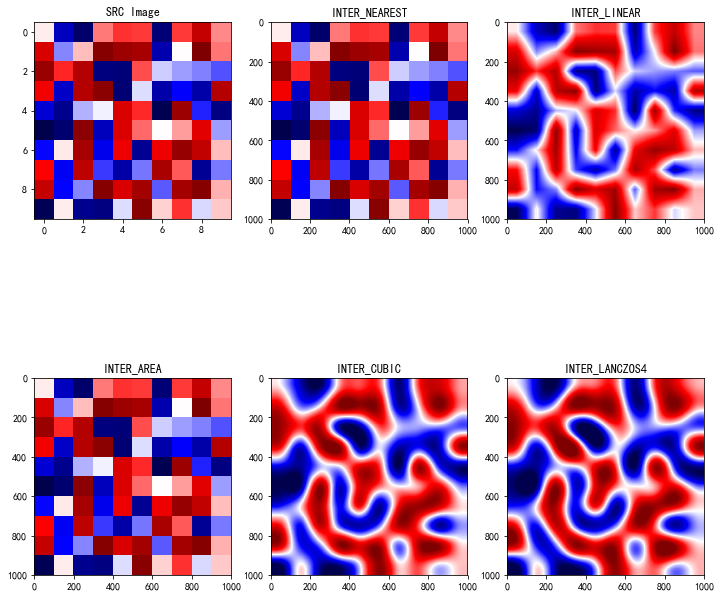

In [10]:
'''
差值算法对比
'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.uint8(np.random.randint(0,255,size=(10,10)))
height,width= img.shape[:2]

# 声明新的维度
new_dimension = (1000, 1000)
plt.figure(figsize=(12,12))
plt.subplot(231)
plt.title("SRC Image")
plt.imshow(img,cmap='seismic')

plt.subplot(232)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_NEAREST)
plt.title("INTER_NEAREST")
plt.imshow(resized,cmap='seismic')

plt.subplot(233)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_LINEAR)
plt.title("INTER_LINEAR")
plt.imshow(resized,cmap='seismic')

plt.subplot(234)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_AREA)
plt.title("INTER_AREA")
plt.imshow(resized,cmap='seismic')

plt.subplot(235)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_CUBIC)
plt.title("INTER_CUBIC")
plt.imshow(resized,cmap='seismic')

plt.subplot(236)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_LANCZOS4)
plt.title("INTER_LANCZOS4")
plt.imshow(resized,cmap='seismic')

plt.show()


## 旋转，可指定围绕中心和角度

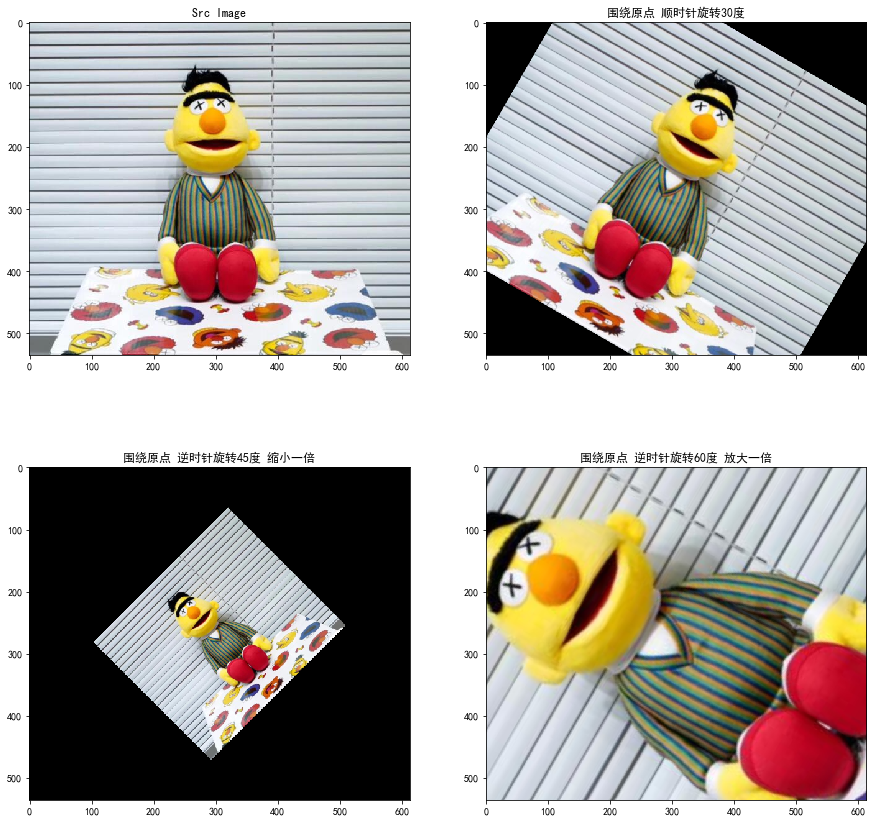

In [6]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# 进行2D 仿射变换
img = cv2.imread('bert.jpg')

rotate1 = rotate(img, -30, None,1)  # 围绕原点 顺时针旋转30度
rotate2 = rotate(img, 45, None,0.5)  # 围绕原点 逆时针旋转45度
rotate3 = rotate(img, 60,None, 2)  # 围绕原点 逆时针旋转60度

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.title("Src Image")
plt.imshow(img[:,:,::-1])

plt.subplot(222)
plt.title("围绕原点 顺时针旋转30度")
plt.imshow(rotate1[:,:,::-1])

plt.subplot(223)
plt.title("围绕原点 逆时针旋转45度 缩小一倍")
plt.imshow(rotate2[:,:,::-1])

plt.subplot(224)
plt.title("围绕原点 逆时针旋转60度 放大一倍")
plt.imshow(rotate3[:,:,::-1])

plt.show()


## 翻转，水平、垂直、中心对称

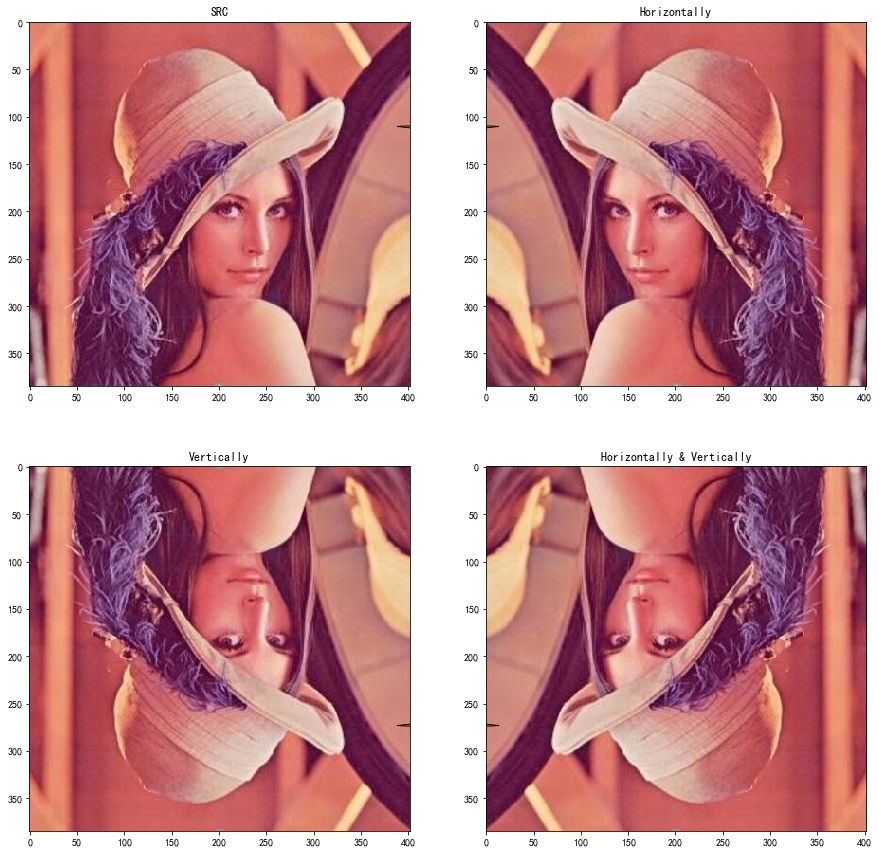

In [7]:

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lane.jpg')

def bgr2rbg(img):
    '''
        将颜色空间从BGR转换为RBG
    '''
    return img[:,:,::-1]

def flip(image, direction):
    if direction == "h":
        flipped = cv2.flip(image, 1)
    elif direction == "v":
        flipped = cv2.flip(image, 0)
    else:
        # both horizontally and vertically
        flipped = cv2.flip(image, -1)


# 水平翻转
flip_h = cv2.flip(img, 1)
# 垂直翻转
flip_v = cv2.flip(img, 0)
# 同时水平翻转与垂直翻转
flip_hv = cv2.flip(img, -1)

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('SRC')
plt.imshow(bgr2rbg(img))

plt.subplot(222)
plt.title('Horizontally')
plt.imshow(bgr2rbg(flip_h))

plt.subplot(223)
plt.title('Vertically')
plt.imshow(bgr2rbg(flip_v))

plt.subplot(224)
plt.title('Horizontally & Vertically')
plt.imshow(bgr2rbg(flip_hv))

plt.show()

# 水平翻转
M1 = np.float32([[-1, 0, width], [0, 1, 0]])
flip_h =  cv2.warpAffine(img, M1, (width, height))

# 垂直翻转
M2 = np.float32([[1, 0, 0], [0, -1, height]])
flip_v =  cv2.warpAffine(img, M2, (width, height))

# 水平垂直同时翻转
M3 = np.float32([[-1, 0, width], [0, -1, height]])
flip_hv =  cv2.warpAffine(img, M3, (width, height))



## 错切

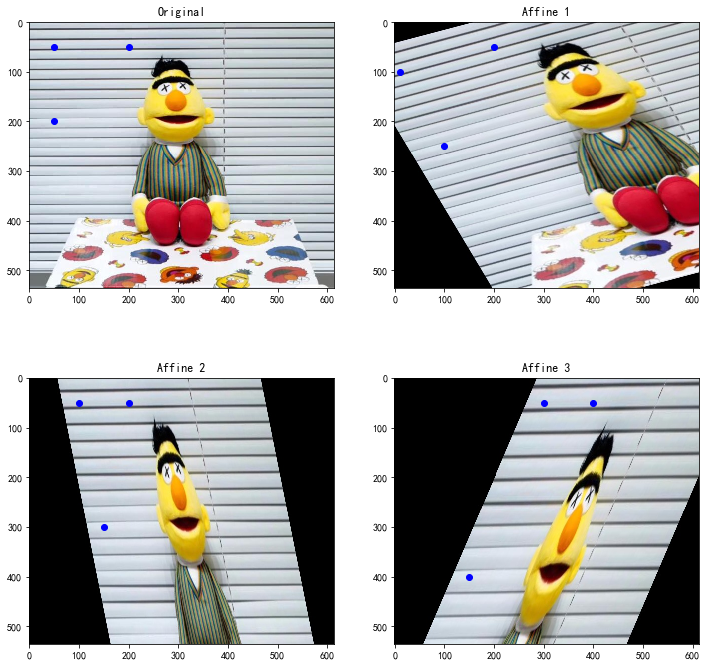

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
pic = "bert"
bimg = pic + ".jpg"
img = cv.imread(bimg, -1) # 1 彩色；0 灰度；-1 原始
rows, cols = img.shape[:2]

#AffineTransform
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst3 = cv.warpAffine(img, M, (cols, rows))
cv.imwrite(pic + "_affine.jpg", dst3)


pts1 = np.float32([[50,50],[200,50],[50,200]])

pts2 = np.float32([[10,100],[200,50],[100,250]])
pts3 = np.float32([[100,50],[200,50],[150,300]])
pts4 = np.float32([[300,50],[400,50],[150,400]])

M = cv.getAffineTransform(pts1,pts2)
dst3 = cv.warpAffine(img, M, (cols, rows))

N = cv.getAffineTransform(pts1,pts3)
dst4 = cv.warpAffine(img, N, (cols, rows))

M2 = cv.getAffineTransform(pts1,pts4)
dst5 = cv.warpAffine(img, M2, (cols, rows))

cv.imwrite(pic + "_affine1.jpg", dst3)
cv.imwrite(pic + "_affine2.jpg", dst4)
cv.imwrite(pic + "_affine3.jpg", dst5)

def shere(img, affinearr1, affinearr2):
    img = cv.imread(img, -1) # 1 彩色；0 灰度；-1 原始
    rows, cols = img.shape[:2]
    pts1 = np.float32([affinearr1])
    pts2 = np.float32([affinearr2])
    M = cv.getAffineTransform(pts1,pts2)
    dst = cv.warpAffine(img, M, (cols, rows))
    return dst

plt.figure(figsize=(12,12))


plt.subplot(2,2,1), plt.title('Original')
tmp1 = cv.imread(pic + ".jpg",-1)
type(tmp1)
tmp1.shape
plt.imshow(np.flip(tmp1, axis = 2))
xa = [50,200,50]
ya = [50,50,200]
plt.plot(xa,ya, 'o',color='b')


plt.subplot(2,2,2),plt.title('Affine 1')
tmp3 = cv.imread(pic + "_affine1.jpg", -1)
type(tmp3)
tmp3.shape
plt.imshow(np.flip(tmp3, axis = 2))
xb = [10,200,100]
yb = [100,50,250]
plt.plot(xb,yb, 'o',color='b')


plt.subplot(2,2,3),plt.title('Affine 2')
tmp2 = cv.imread(pic + "_affine2.jpg", -1)
type(tmp2)
tmp2.shape
plt.imshow(np.flip(tmp2, axis = 2))
xc = [100,200,150]
yc = [50,50,300]
plt.plot(xc,yc, 'o',color='b')

plt.subplot(2,2,4),plt.title('Affine 3')
tmp4 = cv.imread(pic + "_affine3.jpg", -1)
type(tmp2)
tmp4.shape
plt.imshow(np.flip(tmp4, axis = 2))
xd = [300,400,150]
yd = [50,50,400]
plt.plot(xd,yd, 'o',color='b')

plt.show()

In [12]:
def shere(img, affinearr1, affinearr2):
    # affinearr1 = [50,50],[200,50],[50,200]
    img = cv.imread(img, -1) # 1 彩色；0 灰度；-1 原始
    rows, cols = img.shape[:2]
    pts1 = np.float32([affinearr1])
    pts2 = np.float32([affinearr2])
    M = cv.getAffineTransform(pts1,pts2)
    dst = cv.warpAffine(img, M, (cols, rows))
    return dst